## KNN and KMeans

Using assets and liabilities, we can calculate a company's book value (assets - liabilities). We can then calculate price of stock per book value and compare to other companies stocks within the same industry. A classifier can tell us whether a stock is cheap or expensive based on this measure. 

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.cluster import KMeans 

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [147]:
data = pd.read_csv("C:/Users/School/Documents/Depaul/2019.2020/DSC478/Project/stock_complete_info.csv", sep=',').fillna(0)

In [148]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Repurchase Of Stock,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,country,industry,longBusinessSummary,sector,sharesOutstanding,sharesShort,Return,aoi,kama,roc,rsi,tsi,adi,cmf,emi,atr,bband_h,bband_l,adx_pos,adx_neg,macd,Short Term Investments,Deferred Long Term Liab,Qtr,Entire Market Return,Outlier Removed Market Return,Beat Entire Market Return,Beat Outlier Removed Market Return
0,A 2019_Q2,4/30/2019,76.75,77.89,76.69,77.80,1726200,0.0,0.0,1.059000e+09,5.293000e+09,4.653000e+09,4.848000e+09,415000000.0,9.501000e+09,3000000.0,204000000.0,73000000.0,8.330000e+08,3.589000e+09,-5.210000e+08,5.980000e+08,1.226000e+09,1.892000e+09,-5.210000e+08,1.035000e+09,3.102000e+09,1.180000e+08,2.000000e+08,966000000.0,1.787000e+09,7.060000e+08,3.290000e+08,0.0,0.0,-1000000.0,-15000000,-3.500000e+07,56000000.0,-61000000.0,-275000000.0,32000000.0,197000000,-156000000.0,-93000000.0,-1000000.0,-59000000.0,79000000.0,-56000000.0,-32000000.0,-40000000.0,27000000.0,-34000000.0,0.0,0.0,104000000.0,0.0,219000000.0,0.000000e+00,389000000.0,723000000,230000000,230000000,0.0,-20000000.0,0.0,0.0,0.0,22000000,1.357000e+09,1.127000e+09,6.340000e+08,-11000000,0.0,197000000.0,197000000.0,United States,Diagnostics & Research,"Agilent Technologies, Inc. provides applicatio...",Healthcare,309651008,5258241.0,-6.917019,-2.619706,76.215598,-3.173615,50.321067,-12.902244,14510593.61,-0.135524,7.299270,1.521994,0,0,14.867414,29.279115,-0.610567,0.0,0.0,2019_Q2,2.110926,1.502301,0,0
1,A 2019_Q3,7/31/2019,69.71,70.18,68.45,68.94,3846100,0.0,0.0,1.107000e+09,5.277000e+09,4.704000e+09,4.748000e+09,666000000.0,9.452000e+09,3000000.0,130000000.0,-18000000.0,8.330000e+08,3.593000e+09,-5.140000e+08,6.110000e+08,1.382000e+09,2.080000e+09,-5.140000e+08,8.500000e+08,3.189000e+09,1.020000e+08,4.800000e+07,998000000.0,1.786000e+09,6.790000e+08,3.540000e+08,410000000.0,0.0,-2000000.0,29000000,-1.193000e+09,600000000.0,497000000.0,23000000.0,2000000.0,194000000,-383000000.0,-50000000.0,-1000000.0,314000000.0,76000000.0,-51000000.0,-5000000.0,-48000000.0,45000000.0,-30000000.0,-1000000.0,-4000000.0,102000000.0,0.0,231000000.0,0.000000e+00,322000000.0,737000000,313000000,313000000,0.0,-21000000.0,0.0,0.0,0.0,37000000,1.367000e+09,1.054000e+09,6.300000e+08,-82000000,0.0,194000000.0,194000000.0,United States,Diagnostics & Research,"Agilent Technologies, Inc. provides applicatio...",Healthcare,309651008,5258241.0,3.067090,-2.039000,69.517929,-1.612673,41.318386,-14.191339,20756944.92,-0.038812,29.012506,1.366337,0,0,17.365258,27.167584,-0.590718,0.0,0.0,2019_Q3,-2.051225,-2.049707,1,1
2,A 2019_Q4,10/31/2019,75.65,75.77,74.75,

In [149]:
data['bookValue'] = data['Total Assets'] - data['Total Liab'] - data['Intangible Assets']
data['PricetoBook'] = data['Close'] / (data['bookValue'] / data['sharesOutstanding'])
data.shape

(7648, 106)

Some balance sheet data had zero where we couldn't calculate book value. We removed these stocks. We also removed incidences where liabilities showed to be grater than assets. Finally, we removed outliers and plotted a histogram of the p/b.

In [150]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()

In [151]:
indexNames = data[data['PricetoBook'] <= 0].index
data.drop(indexNames, inplace=True)
data.shape

(7012, 106)

In [152]:
q_low = data['PricetoBook'].quantile(0.01)
q_hi  = data['PricetoBook'].quantile(0.99)

dataExOutliers = data[(data['PricetoBook'] < q_hi) & (data['PricetoBook'] > q_low)]
dataExOutliers.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Repurchase Of Stock,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,country,industry,longBusinessSummary,sector,sharesOutstanding,sharesShort,Return,aoi,kama,roc,rsi,tsi,adi,cmf,emi,atr,bband_h,bband_l,adx_pos,adx_neg,macd,Short Term Investments,Deferred Long Term Liab,Qtr,Entire Market Return,Outlier Removed Market Return,Beat Entire Market Return,Beat Outlier Removed Market Return,bookValue,PricetoBook
0,A 2019_Q2,4/30/2019,76.75,77.89,76.69,77.80,1726200,0.0,0.0,1.059000e+09,5.293000e+09,4.653000e+09,4.848000e+09,415000000.0,9.501000e+09,3000000.0,204000000.0,73000000.0,8.330000e+08,3.589000e+09,-5.210000e+08,5.980000e+08,1.226000e+09,1.892000e+09,-5.210000e+08,1.035000e+09,3.102000e+09,1.180000e+08,2.000000e+08,966000000.0,1.787000e+09,7.060000e+08,3.290000e+08,0.0,0.0,-1000000.0,-15000000,-3.500000e+07,56000000.0,-61000000.0,-275000000.0,32000000.0,197000000,-156000000.0,-93000000.0,-1000000.0,-59000000.0,79000000.0,-56000000.0,-32000000.0,-40000000.0,27000000.0,-34000000.0,0.0,0.0,104000000.0,0.0,219000000.0,0.000000e+00,389000000.0,723000000,230000000,230000000,0.0,-20000000.0,0.0,0.0,0.0,22000000,1.357000e+09,1.127000e+09,6.340000e+08,-11000000,0.0,197000000.0,197000000.0,United States,Diagnostics & Research,"Agilent Technologies, Inc. provides applicatio...",Healthcare,309651008,5258241.0,-6.917019,-2.619706,76.215598,-3.173615,50.321067,-12.902244,14510593.61,-0.135524,7.299270,1.521994,0,0,14.867414,29.279115,-0.610567,0.0,0.0,2019_Q2,2.110926,1.502301,0,0,3.789000e+09,6.358102
1,A 2019_Q3,7/31/2019,69.71,70.18,68.45,68.94,3846100,0.0,0.0,1.107000e+09,5.277000e+09,4.704000e+09,4.748000e+09,666000000.0,9.452000e+09,3000000.0,130000000.0,-18000000.0,8.330000e+08,3.593000e+09,-5.140000e+08,6.110000e+08,1.382000e+09,2.080000e+09,-5.140000e+08,8.500000e+08,3.189000e+09,1.020000e+08,4.800000e+07,998000000.0,1.786000e+09,6.790000e+08,3.540000e+08,410000000.0,0.0,-2000000.0,29000000,-1.193000e+09,600000000.0,497000000.0,23000000.0,2000000.0,194000000,-383000000.0,-50000000.0,-1000000.0,314000000.0,76000000.0,-51000000.0,-5000000.0,-48000000.0,45000000.0,-30000000.0,-1000000.0,-4000000.0,102000000.0,0.0,231000000.0,0.000000e+00,322000000.0,737000000,313000000,313000000,0.0,-21000000.0,0.0,0.0,0.0,37000000,1.367000e+09,1.054000e+09,6.300000e+08,-82000000,0.0,194000000.0,194000000.0,United States,Diagnostics & Research,"Agilent Technologies, Inc. provides applicatio...",Healthcare,309651008,5258241.0,3.067090,-2.039000,69.517929,-1.612673,41.318386,-14.191339,20756944.92,-0.038812,29.012506,1.366337,0,0,17.365258,27.167584,-0.590718,0.0,0.0,2019_Q3,-2.051225,-2.049707,1

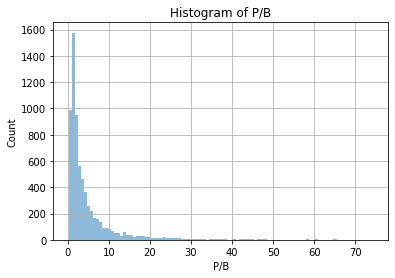

In [153]:
plt.hist(dataExOutliers['PricetoBook'], bins=100, alpha=0.5)
plt.xlabel('P/B')
plt.ylabel('Count')
plt.title('Histogram of P/B')
plt.grid(True)
plt.show()

In [154]:
m = dataExOutliers.groupby(['industry'])[['PricetoBook']].apply(np.median)

In [155]:
m.name = 'MedianP/BPerIndustry'
m

industry
Advertising Agencies                       4.119569
Aerospace & Defense                        3.511808
Agricultural Inputs                        1.057431
Airlines                                   1.603545
Airports & Air Services                    0.812967
Aluminum                                   0.917447
Apparel Manufacturing                      2.927097
Apparel Retail                             1.770052
Asset Management                           2.305211
Auto & Truck Dealerships                   1.940431
Auto Manufacturers                         2.661272
Auto Parts                                 2.142634
Banks—Diversified                          1.037940
Banks—Regional                             1.156839
Beverages—Brewers                          4.662425
Beverages—Non-Alcoholic                   12.230276
Biotechnology                              4.196949
Broadcasting                               1.141818
Building Materials                         2.616044
Bui

In [156]:
dataExOutliers = dataExOutliers.join(m, on=['industry'])

In [157]:
dataExOutliers['OverUnderPrice'] = np.sign(dataExOutliers['PricetoBook'] - dataExOutliers['MedianP/BPerIndustry'])
dataExOutliers['OverUnderPrice'] = dataExOutliers['OverUnderPrice'].where(dataExOutliers['OverUnderPrice'] != -1, 0)

In [158]:
dataExOutliers = dataExOutliers.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 
                            'Stock Splits', 'longBusinessSummary', 'country', 'industry', 'sector',
                                      'Qtr', 'Entire Market Return', 'Outlier Removed Market Return',
                                     'Beat Entire Market Return', 'Beat Outlier Removed Market Return',
                                     'bookValue', 'PricetoBook', 'MedianP/BPerIndustry'], axis=1)

In [159]:
dataExOutliers.iloc[:, 1:68] = dataExOutliers.iloc[:,1:68].div(dataExOutliers.sharesOutstanding, axis=0)
dataExOutliers.iloc[:, [69,86,87]] = dataExOutliers.iloc[:, [69,86,87]].div(dataExOutliers.sharesOutstanding, axis=0)

In [160]:
dataExOutliers = dataExOutliers.drop(['sharesOutstanding'], axis=1)

In [161]:
dataExOutliers = dataExOutliers.iloc[:, 1:]

In [162]:
dataExOutliers.head(10)

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Repurchase Of Stock,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,sharesShort,Return,aoi,kama,roc,rsi,tsi,adi,cmf,emi,atr,bband_h,bband_l,adx_pos,adx_neg,macd,Short Term Investments,Deferred Long Term Liab,OverUnderPrice
0,3.419979,17.093437,15.026594,15.656335,1.340218,30.682929,0.009688,0.658806,0.235749,2.690125,11.590468,-1.682539,1.931206,3.959296,6.110104,-1.682539,3.342473,10.017729,0.381074,0.645888,3.119641,5.771013,2.279986,1.062486,0.000000,0.000000,-0.003229,-0.048442,-0.113030,0.180849,-0.196996,-0.888097,0.103342,0.636200,-0.503793,-0.300338,-0.003229,-0.190537,0.255126,-0.180849,-0.103342,-0.129178,0.087195,-0.109801,0.000000,0.000000,0.335862,0.0,0.707248,0.000000,1.256253,2.334887,0.742772,0.742772,0.000000,-0.064589,0.0,0.0,0.0,0.071048,4.382353,3.639581,2.047466,-0.035524,0.0,0.636200,0.636200,0.016981,-6.917019,-2.619706,76.215598,-3.173615,50.321067,-12.902244,1.451059e+07,-0.135524,7.299270,1.521994,0,0,14.867414,29.279115,-0.610567,0.0,0.0,0.0
1,3.574992,17.041766,15.191296,15.333391,2.150808,30.524687,0.009688,0.419827,-0.058130,2.690125,11.603385,-1.659933,1.973189,4.463089,6.717240,-1.659933,2.745026,10.298691,0.329403,0.155013,3.222983,5.767784,2.192791,1.143223,1.324071,0.000000,-0.006459,0.093654,-3.852724,1.937665,1.605033,0.074277,0.006459,0.626512,-1.236876,-0.161472,-0.003229,1.014045,0.245438,-0.164702,-0.016147,-0.155013,0.145325,-0.096883,-0.003229,-0.012918,0.329403,0.0,0.746001,0.000000,1.039880,2.380099,1.010815,1.010815,0.000000,-0.067818,0.0,0.0,0.0,0.119489,4.414647,3.403832,2.034549,-0.264814,0.0,0.626512,0.626512,0.016981,3.067090,-2.039000,69.517929,-1.612673,41.318386,-14.191339,2.075694e+07,-0.038812,29.012506,1.366337,0,0,17.365258,27.167584,-0.590718,0.0,0.0,0.0
2,1.650245,17.019160,12.523776,15.330162,1.230417,27.853938,0.009688,0.568382,-0.393992,3.106723,10.033877,-1.304695,1.976419,5.699965,5.238155,-1.304695,2.709502,11.164181,0.319715,3.646040,2.764402,4.178898,2.131432,1.020504,0.000000,1.627639,-0.009688,0.025836,-0.164702,1.937665,-1.879535,0.032294,0.061359,0.616823,-1.259482,-1.776193,0.003229,0.781525,0.177619,-0.164702,-0.032294,-0.132407,0.093654,-0.151784,-0.003229,-0.012918,0.326174,0.0,0.716936,0.000000,1.101240,2.234774,0.807361,0.807361,0.000000,-0.058130,0.0,0.0,0.0,0.100113,4.114309,3.306949,1.879535,-0.090424,0.0,0.616823,0.616823,0.016981,11.563265,0.087441,75.035474,0.000000,53.942382,6.623598,1.926595e+07,-0.004604,-8.933539,1.355502,0,0,24.899534,22.458885,0.276914,0.0,0.0,0.0
3,1.737440,17.254909,12.585136,16.550891,1.230417,29.136027,0.009688,0.584529,0.574841,3.168083,10.050024,-1.288547,2.057155,6.959448,3.610516,-1.285318,2.670749,12.310633,0.310026,4.76

In [163]:
dataExTarget = dataExOutliers.drop('OverUnderPrice', axis=1)
target = dataExOutliers['OverUnderPrice']

In [164]:
dataExTarget.reset_index(inplace = True, drop = True)
target.reset_index(inplace = True, drop = True)

In [167]:
for i in range(len(target)):
    if(target[i] == 0):
        target[i] ='Under'
    else:
        target[i] = 'Over'

C:\Users\School\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\School\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\School\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [169]:
train, test, target_train, target_test = train_test_split(dataExTarget, target, test_size=0.2, random_state=33)

print ("data frame shapes to make sure splits are correct")
print ("test shape:", test.shape)
print ("train shape:", train.shape)
print ("test targets shape:", target_test.shape)
print ("train targets shape:", target_train.shape)

data frame shapes to make sure splits are correct
test shape: (1374, 85)
train shape: (5496, 85)
test targets shape: (1374,)
train targets shape: (5496,)


In [170]:
min_max_scaler = preprocessing.MinMaxScaler().fit(train)
train_norm = min_max_scaler.transform(train)
test_norm = min_max_scaler.transform(test)

In [171]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
train_norm[0:5]

array([[0.  , 0.03, 0.  , 0.03, 0.  , 0.01, 0.01, 0.  , 0.02, 0.  , 0.  ,
        0.97, 0.  , 0.  , 0.  , 0.42, 0.09, 0.  , 0.  , 0.16, 0.  , 0.01,
        0.  , 0.  , 0.  , 0.  , 0.54, 0.4 , 0.61, 0.49, 0.33, 0.63, 0.  ,
        0.6 , 0.44, 1.  , 0.69, 0.62, 0.17, 0.98, 0.44, 0.77, 0.28, 0.94,
        0.74, 0.53, 0.01, 0.  , 0.62, 0.05, 0.01, 0.38, 0.62, 0.62, 0.15,
        0.98, 0.  , 0.  , 0.  , 0.79, 0.03, 0.01, 0.09, 0.64, 0.19, 0.59,
        0.59, 0.04, 0.11, 0.82, 0.01, 0.14, 0.45, 0.39, 0.43, 0.53, 0.74,
        0.01, 0.  , 0.  , 0.22, 0.29, 0.9 , 0.  , 0.  ],
       [0.06, 0.07, 0.02, 0.04, 0.  , 0.02, 0.01, 0.01, 0.02, 0.  , 0.11,
        0.97, 0.  , 0.02, 0.  , 0.4 , 0.07, 0.01, 0.  , 0.12, 0.01, 0.05,
        0.02, 0.  , 0.  , 0.  , 0.54, 0.4 , 0.61, 0.49, 0.33, 0.63, 0.  ,
        0.59, 0.44, 1.  , 0.69, 0.61, 0.15, 1.  , 0.44, 0.77, 0.28, 0.94,
        0.74, 0.53, 0.01, 0.  , 0.61, 0.03, 0.04, 0.4 , 0.62, 0.62, 0.15,
        0.9 , 0.  , 0.  , 0.  , 0.78, 0.06, 0.05, 0.12,

In [172]:
train_norm[0:5]

array([[0.  , 0.03, 0.  , 0.03, 0.  , 0.01, 0.01, 0.  , 0.02, 0.  , 0.  ,
        0.97, 0.  , 0.  , 0.  , 0.42, 0.09, 0.  , 0.  , 0.16, 0.  , 0.01,
        0.  , 0.  , 0.  , 0.  , 0.54, 0.4 , 0.61, 0.49, 0.33, 0.63, 0.  ,
        0.6 , 0.44, 1.  , 0.69, 0.62, 0.17, 0.98, 0.44, 0.77, 0.28, 0.94,
        0.74, 0.53, 0.01, 0.  , 0.62, 0.05, 0.01, 0.38, 0.62, 0.62, 0.15,
        0.98, 0.  , 0.  , 0.  , 0.79, 0.03, 0.01, 0.09, 0.64, 0.19, 0.59,
        0.59, 0.04, 0.11, 0.82, 0.01, 0.14, 0.45, 0.39, 0.43, 0.53, 0.74,
        0.01, 0.  , 0.  , 0.22, 0.29, 0.9 , 0.  , 0.  ],
       [0.06, 0.07, 0.02, 0.04, 0.  , 0.02, 0.01, 0.01, 0.02, 0.  , 0.11,
        0.97, 0.  , 0.02, 0.  , 0.4 , 0.07, 0.01, 0.  , 0.12, 0.01, 0.05,
        0.02, 0.  , 0.  , 0.  , 0.54, 0.4 , 0.61, 0.49, 0.33, 0.63, 0.  ,
        0.59, 0.44, 1.  , 0.69, 0.61, 0.15, 1.  , 0.44, 0.77, 0.28, 0.94,
        0.74, 0.53, 0.01, 0.  , 0.61, 0.03, 0.04, 0.4 , 0.62, 0.62, 0.15,
        0.9 , 0.  , 0.  , 0.  , 0.78, 0.06, 0.05, 0.12,

In [197]:
n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(train_norm, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [198]:
knnpreds_test = knnclf.predict(test_norm)

In [199]:
print(classification_report(target_test, knnpreds_test))

              precision    recall  f1-score   support

        Over       0.61      0.61      0.61       669
       Under       0.63      0.63      0.63       705

    accuracy                           0.62      1374
   macro avg       0.62      0.62      0.62      1374
weighted avg       0.62      0.62      0.62      1374



In [200]:
knncm = confusion_matrix(target_test, knnpreds_test)
print (knncm)

[[407 262]
 [261 444]]


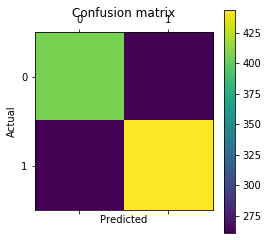

In [201]:
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We ran this for both n=5 and n=10. Overall, it was more accurate with n=10. Uniform had a higher accuracy for Over, but worse for Under. Therefore we decided on n=10 and weight=distance.

In [202]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [203]:
treeclf = treeclf.fit(train, target_train)

In [204]:
treepreds_test = treeclf.predict(test)

In [205]:
print(classification_report(target_test, treepreds_test))

              precision    recall  f1-score   support

        Over       0.75      0.77      0.76       669
       Under       0.78      0.76      0.77       705

    accuracy                           0.76      1374
   macro avg       0.76      0.77      0.76      1374
weighted avg       0.77      0.76      0.76      1374



In [216]:
treecm = confusion_matrix(target_test, treepreds_test, labels=['Under','Over'])
print(treecm)

[[537 168]
 [155 514]]


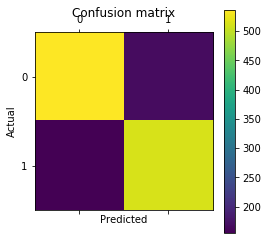

In [217]:
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [219]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train, target_train)
nbpreds_test = nbclf.predict(test)

In [220]:
print(classification_report(target_test, nbpreds_test))

              precision    recall  f1-score   support

        Over       0.61      0.07      0.13       669
       Under       0.52      0.95      0.67       705

    accuracy                           0.53      1374
   macro avg       0.57      0.51      0.40      1374
weighted avg       0.56      0.53      0.41      1374



In [225]:
nbcm = confusion_matrix(target_test, nbpreds_test, labels=['Under','Over'])
print (nbcm)

[[673  32]
 [619  50]]


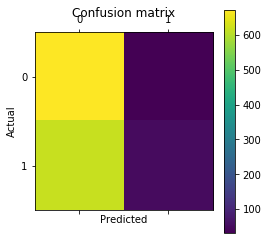

In [226]:
plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [227]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(train, target_train)
ldpreds_test = ldclf.predict(test)

In [228]:
print(classification_report(target_test, ldpreds_test))

              precision    recall  f1-score   support

        Over       0.71      0.70      0.71       669
       Under       0.72      0.73      0.73       705

    accuracy                           0.72      1374
   macro avg       0.72      0.72      0.72      1374
weighted avg       0.72      0.72      0.72      1374



In [229]:
ldcm = confusion_matrix(target_test, ldpreds_test, labels=['Under','Over'])
print(ldcm)

[[517 188]
 [202 467]]


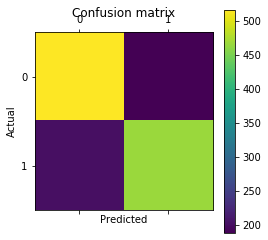

In [230]:
plt.matshow(ldcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

All three classifiers had a better than 50% accuracy rate on identifier whether a stock would be over or under priced based on price to book value for a stock. Where each stock's p/b was compared to the median for its industry. However, the decision tree classifier had the highest accuracy ratio 76% accuracy rate. LDA was not far behind with a 72% accuracy rate.

## Now we'll see if we can perform clustering to see if stocks can be placed into the correct industry

In [460]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Repurchase Of Stock,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,country,industry,longBusinessSummary,sector,sharesOutstanding,sharesShort,Return,aoi,kama,roc,rsi,tsi,adi,cmf,emi,atr,bband_h,bband_l,adx_pos,adx_neg,macd,Short Term Investments,Deferred Long Term Liab,Qtr,Entire Market Return,Outlier Removed Market Return,Beat Entire Market Return,Beat Outlier Removed Market Return,bookValue,PricetoBook
0,A 2019_Q2,4/30/2019,76.75,77.89,76.69,77.80,1726200,0.00,0.00,"1,059,000,000.00","5,293,000,000.00","4,653,000,000.00","4,848,000,000.00","415,000,000.00","9,501,000,000.00","3,000,000.00","204,000,000.00","73,000,000.00","833,000,000.00","3,589,000,000.00","-521,000,000.00","598,000,000.00","1,226,000,000.00","1,892,000,000.00","-521,000,000.00","1,035,000,000.00","3,102,000,000.00","118,000,000.00","200,000,000.00","966,000,000.00","1,787,000,000.00","706,000,000.00","329,000,000.00",0.00,0.00,"-1,000,000.00",-15000000,"-35,000,000.00","56,000,000.00","-61,000,000.00","-275,000,000.00","32,000,000.00",197000000,"-156,000,000.00","-93,000,000.00","-1,000,000.00","-59,000,000.00","79,000,000.00","-56,000,000.00","-32,000,000.00","-40,000,000.00","27,000,000.00","-34,000,000.00",0.00,0.00,"104,000,000.00",0.00,"219,000,000.00",0.00,"389,000,000.00",723000000,230000000,230000000,0.00,"-20,000,000.00",0.00,0.00,0.00,22000000,"1,357,000,000.00","1,127,000,000.00","634,000,000.00",-11000000,0.00,"197,000,000.00","197,000,000.00",United States,Diagnostics & Research,"Agilent Technologies, Inc. provides applicatio...",Healthcare,309651008,"5,258,241.00",-6.92,-2.62,76.22,-3.17,50.32,-12.90,"14,510,593.61",-0.14,7.30,1.52,0,0,14.87,29.28,-0.61,0.00,0.00,2019_Q2,2.11,1.50,0,0,"3,789,000,000.00",6.36
1,A 2019_Q3,7/31/2019,69.71,70.18,68.45,68.94,3846100,0.00,0.00,"1,107,000,000.00","5,277,000,000.00","4,704,000,000.00","4,748,000,000.00","666,000,000.00","9,452,000,000.00","3,000,000.00","130,000,000.00","-18,000,000.00","833,000,000.00","3,593,000,000.00","-514,000,000.00","611,000,000.00","1,382,000,000.00","2,080,000,000.00","-514,000,000.00","850,000,000.00","3,189,000,000.00","102,000,000.00","48,000,000.00","998,000,000.00","1,786,000,000.00","679,000,000.00","354,000,000.00","410,000,000.00",0.00,"-2,000,000.00",29000000,"-1,193,000,000.00","600,000,000.00","497,000,000.00","23,000,000.00","2,000,000.00",194000000,"-383,000,000.00","-50,000,000.00","-1,000,000.00","314,000,000.00","76,000,000.00","-51,000,000.00","-5,000,000.00","-48,000,000.00","45,000,000.00","-30,000,000.00","-1,000,000.00","-4,000,000.00","102,000,000.00",0.00,"231,000,000.00",0.00,"322,000,000.00",7

In [461]:
clusterData = data.drop(['Qtr', 'Entire Market Return', 'Outlier Removed Market Return', 'Beat Entire Market Return',
                        'Beat Outlier Removed Market Return', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 
                        'Dividends', 'Stock Splits', 'country', 'longBusinessSummary', 'industry'], axis=1).fillna(0)

In [462]:
clusterData.head()

,Unnamed: 0,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Repurchase Of Stock,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,sector,sharesOutstanding,sharesShort,Return,aoi,kama,roc,rsi,tsi,adi,cmf,emi,atr,bband_h,bband_l,adx_pos,adx_neg,macd,Short Term Investments,Deferred Long Term Liab,bookValue,PricetoBook
0,A 2019_Q2,"1,059,000,000.00","5,293,000,000.00","4,653,000,000.00","4,848,000,000.00","415,000,000.00","9,501,000,000.00","3,000,000.00","204,000,000.00","73,000,000.00","833,000,000.00","3,589,000,000.00","-521,000,000.00","598,000,000.00","1,226,000,000.00","1,892,000,000.00","-521,000,000.00","1,035,000,000.00","3,102,000,000.00","118,000,000.00","200,000,000.00","966,000,000.00","1,787,000,000.00","706,000,000.00","329,000,000.00",0.00,0.00,"-1,000,000.00",-15000000,"-35,000,000.00","56,000,000.00","-61,000,000.00","-275,000,000.00","32,000,000.00",197000000,"-156,000,000.00","-93,000,000.00","-1,000,000.00","-59,000,000.00","79,000,000.00","-56,000,000.00","-32,000,000.00","-40,000,000.00","27,000,000.00","-34,000,000.00",0.00,0.00,"104,000,000.00",0.00,"219,000,000.00",0.00,"389,000,000.00",723000000,230000000,230000000,0.00,"-20,000,000.00",0.00,0.00,0.00,22000000,"1,357,000,000.00","1,127,000,000.00","634,000,000.00",-11000000,0.00,"197,000,000.00","197,000,000.00",Healthcare,309651008,"5,258,241.00",-6.92,-2.62,76.22,-3.17,50.32,-12.90,"14,510,593.61",-0.14,7.30,1.52,0,0,14.87,29.28,-0.61,0.00,0.00,"3,789,000,000.00",6.36
1,A 2019_Q3,"1,107,000,000.00","5,277,000,000.00","4,704,000,000.00","4,748,000,000.00","666,000,000.00","9,452,000,000.00","3,000,000.00","130,000,000.00","-18,000,000.00","833,000,000.00","3,593,000,000.00","-514,000,000.00","611,000,000.00","1,382,000,000.00","2,080,000,000.00","-514,000,000.00","850,000,000.00","3,189,000,000.00","102,000,000.00","48,000,000.00","998,000,000.00","1,786,000,000.00","679,000,000.00","354,000,000.00","410,000,000.00",0.00,"-2,000,000.00",29000000,"-1,193,000,000.00","600,000,000.00","497,000,000.00","23,000,000.00","2,000,000.00",194000000,"-383,000,000.00","-50,000,000.00","-1,000,000.00","314,000,000.00","76,000,000.00","-51,000,000.00","-5,000,000.00","-48,000,000.00","45,000,000.00","-30,000,000.00","-1,000,000.00","-4,000,000.00","102,000,000.00",0.00,"231,000,000.00",0.00,"322,000,000.00",737000000,313000000,313000000,0.00,"-21,000,000.00",0.00,0.00,0.00,37000000,"1,367,000,000.00","1,054,000,000.00","630,000,000.00",-82000000,0.00,"194,000,000.00","194,000,000.00",Healthcare,309651008,"5,258,241.00",3.07,-2.04,69.52,-1.61,41.32,-14.19,"20,756,944.92",-0.04,29.01,1.37,0,0,17.37,27.17,-0.59,0.00,0.00,"3,641,000,000.00",5.86
2,A 2019_Q4,"511,000,000.00","5,270,000,000.00","3,878,000,000.00","4,747,000,000.0

In [463]:
clusterData.iloc[:, 1:68]

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Repurchase Of Stock,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares
0,"1,059,000,000.00","5,293,000,000.00","4,653,000,000.00","4,848,000,000.00","415,000,000.00","9,501,000,000.00","3,000,000.00","204,000,000.00","73,000,000.00","833,000,000.00","3,589,000,000.00","-521,000,000.00","598,000,000.00","1,226,000,000.00","1,892,000,000.00","-521,000,000.00","1,035,000,000.00","3,102,000,000.00","118,000,000.00","200,000,000.00","966,000,000.00","1,787,000,000.00","706,000,000.00","329,000,000.00",0.00,0.00,"-1,000,000.00",-15000000,"-35,000,000.00","56,000,000.00","-61,000,000.00","-275,000,000.00","32,000,000.00",197000000,"-156,000,000.00","-93,000,000.00","-1,000,000.00","-59,000,000.00","79,000,000.00","-56,000,000.00","-32,000,000.00","-40,000,000.00","27,000,000.00","-34,000,000.00",0.00,0.00,"104,000,000.00",0.00,"219,000,000.00",0.00,"389,000,000.00",723000000,230000000,230000000,0.00,"-20,000,000.00",0.00,0.00,0.00,22000000,"1,357,000,000.00","1,127,000,000.00","634,000,000.00",-11000000,0.00,"197,000,000.00","197,000,000.00"
1,"1,107,000,000.00","5,277,000,000.00","4,704,000,000.00","4,748,000,000.00","666,000,000.00","9,452,000,000.00","3,000,000.00","130,000,000.00","-18,000,000.00","833,000,000.00","3,593,000,000.00","-514,000,000.00","611,000,000.00","1,382,000,000.00","2,080,000,000.00","-514,000,000.00","850,000,000.00","3,189,000,000.00","102,000,000.00","48,000,000.00","998,000,000.00","1,786,000,000.00","679,000,000.00","354,000,000.00","410,000,000.00",0.00,"-2,000,000.00",29000000,"-1,193,000,000.00","600,000,000.00","497,000,000.00","23,000,000.00","2,000,000.00",194000000,"-383,000,000.00","-50,000,000.00","-1,000,000.00","314,000,000.00","76,000,000.00","-51,000,000.00","-5,000,000.00","-48,000,000.00","45,000,000.00","-30,000,000.00","-1,000,000.00","-4,000,000.00","102,000,000.00",0.00,"231,000,000.00",0.00,"322,000,000.00",737000000,313000000,313000000,0.00,"-21,000,000.00",0.00,0.00,0.00,37000000,"1,367,000,000.00","1,054,000,000.00","630,000,000.00",-82000000,0.00,"194,000,000.00","194,000,000.00"
2,"511,000,000.00","5,270,000,000.00","3,878,000,000.00","4,747,000,000.00","381,000,000.00","8,625,000,000.00","3,000,000.00","176,000,000.00","-122,000,000.00","962,000,000.00","3,107,000,000.00","-404,000,000.00","612,000,000.00","1,765,000,000.00","1,622,000,000.00","-404,000,000.00","839,000,000.00","3,457,000,000.00","99,000,000.00","1,129,000,000.00","856,000,000.00","1,294,000,000.00","660,000,000.00","316,000,000.00",0.00,"504,000,000.00","-3,000,000.00",8000000,"-51,000,000.00","600,000,000.00","-582,000,000.00","10,000,000.00","19,000,000.00",191000000,"-390,000,000.00","-550,000,000.00","1,000,000.00","2

In [464]:
clusterData.iloc[:, 1:68] = clusterData.iloc[:,1:68].div(clusterData.sharesOutstanding, axis=0)
clusterData.iloc[:, [70,86,87]] = clusterData.iloc[:, [70,86,87]].div(clusterData.sharesOutstanding, axis=0)

In [465]:
clusterData = clusterData.drop(['sharesOutstanding', 'bookValue'], axis=1)
clusterData = clusterData.iloc[:, 1:]
clusterData.head()

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,Other Liab,Good Will,Treasury Stock,Other Assets,Cash,Total Current Liabilities,Other Stockholder Equity,Property Plant Equipment,Total Current Assets,Long Term Investments,Net Tangible Assets,Net Receivables,Long Term Debt,Inventory,Accounts Payable,Deferred Long Term Asset Charges,Short Long Term Debt,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Repurchase Of Stock,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Dividends Paid,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Investing Activities,Other Cashflows From Financing Activities,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Selling General Administrative,Gross Profit,Ebit,Operating Income,Other Operating Expenses,Interest Expense,Extraordinary Items,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,sector,sharesShort,Return,aoi,kama,roc,rsi,tsi,adi,cmf,emi,atr,bband_h,bband_l,adx_pos,adx_neg,macd,Short Term Investments,Deferred Long Term Liab,PricetoBook
0,3.42,17.09,15.03,15.66,1.34,30.68,0.01,0.66,0.24,2.69,11.59,-1.68,1.93,3.96,6.11,-1.68,3.34,10.02,0.38,0.65,3.12,5.77,2.28,1.06,0.00,0.00,-0.00,-0.05,-0.11,0.18,-0.20,-0.89,0.10,0.64,-0.50,-0.30,-0.00,-0.19,0.26,-0.18,-0.10,-0.13,0.09,-0.11,0.00,0.00,0.34,0.00,0.71,0.00,1.26,2.33,0.74,0.74,0.00,-0.06,0.00,0.00,0.00,0.07,4.38,3.64,2.05,-0.04,0.00,0.64,0.64,Healthcare,0.02,-6.92,-2.62,76.22,-3.17,50.32,-12.90,"14,510,593.61",-0.14,7.30,1.52,0,0,14.87,29.28,-0.61,0.00,0.00,6.36
1,3.57,17.04,15.19,15.33,2.15,30.52,0.01,0.42,-0.06,2.69,11.60,-1.66,1.97,4.46,6.72,-1.66,2.75,10.30,0.33,0.16,3.22,5.77,2.19,1.14,1.32,0.00,-0.01,0.09,-3.85,1.94,1.61,0.07,0.01,0.63,-1.24,-0.16,-0.00,1.01,0.25,-0.16,-0.02,-0.16,0.15,-0.10,-0.00,-0.01,0.33,0.00,0.75,0.00,1.04,2.38,1.01,1.01,0.00,-0.07,0.00,0.00,0.00,0.12,4.41,3.40,2.03,-0.26,0.00,0.63,0.63,Healthcare,0.02,3.07,-2.04,69.52,-1.61,41.32,-14.19,"20,756,944.92",-0.04,29.01,1.37,0,0,17.37,27.17,-0.59,0.00,0.00,5.86
2,1.65,17.02,12.52,15.33,1.23,27.85,0.01,0.57,-0.39,3.11,10.03,-1.30,1.98,5.70,5.24,-1.30,2.71,11.16,0.32,3.65,2.76,4.18,2.13,1.02,0.00,1.63,-0.01,0.03,-0.16,1.94,-1.88,0.03,0.06,0.62,-1.26,-1.78,0.00,0.78,0.18,-0.16,-0.03,-0.13,0.09,-0.15,-0.00,-0.01,0.33,0.00,0.72,0.00,1.10,2.23,0.81,0.81,0.00,-0.06,0.00,0.00,0.00,0.10,4.11,3.31,1.88,-0.09,0.00,0.62,0.62,Healthcare,0.02,11.56,0.09,75.04,0.00,53.94,6.62,"19,265,950.33",-0.00,-8.93,1.36,0,0,24.90,22.46,0.28,0.00,0.00,5.51
3,1.74,17.25,12.59,16.55,1.23,29.14,0.01,0.58,0.57,3.17,10.05,-1.29,2.06,6.96,3.61,-1.29,2.67,12.31,0.31,4.76,2.64,5.81,2.12,1.01,0.00,0.00,-0.05,0.03,-0.18,1.94,-0.30,-0.05,0.04,0.59,0.31,-0.16,-0.02,0.81,0.17,-0.17,-0.03,0.02,0.09,-0.13,-0.00,-0.01,0.32,0.00,0.70,0.00,1.10,2.16,0.74,0.74,0.00,-0.05,0.00,0.00,0.00,0.12,4.00,3.26,1.84,-0.03,0.00,0.59,0.59,Healthcare,0.02,-15.84,-0.33,86.91,-6.18,34.39,7.72,"37,698,861.53",0.09,-68.06,1.48,0,1,21.38,39.12,1.16,0.00,0.00,5.56
4,0.00,51.89,42.17,22.99,2.89,73.42,0.01,0.29,-2.56,20.04,0.00,-26.34,11.29,4.46,11.96,-26.34,38.51,17.93,5.70,22.99,3.58,9.69,8.12,6.86,2.29,0.01,-0.01,-0.65,0.58,0.00,-0.24,-0.72,0.00,0.43,-0.27,0.00,-0.13,-0.48,0.91,0.00,0.22,-0.38,-0.25,-0.49,0.00,-0.24,0.04,0.00,1.18,8.26,0.46,2.00,0.60,0.60,-0.01,-0.16,0.00,0.00,0.00,0.43,12.81,12.21,10.81,0.58,0.00,0.75,0.43,Basic Materials,0.06,-16.87,0.06,22.58,10.58,56.43,-7.23,"-13,692,580.48",-0.04,-0.39,0.77,1,0,20.61,18.73,-0.49,0.00,0.00,0.75


In [466]:
target = clusterData['sector']
temp = {i: j for j, i in enumerate(set(target))} 
res = [temp[i] for i in target] 
target = np.array(res)
target = target.ravel()

In [467]:
clusterData['target'] = target

In [468]:
target = clusterData['target']
featureData = clusterData.drop(['sector', 'target'], axis=1)

In [469]:
scaler = MinMaxScaler()
scaler.fit(featureData)
data_s = scaler.transform(featureData)
data_s

array([[0.02, 0.03, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.02, 0.03, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.03, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ]])

In [470]:
kmeans = KMeans(n_clusters=11, max_iter=500)

In [471]:
kmeans.fit(data_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [472]:
clusters = kmeans.predict(data_s)

In [473]:
clusterFrame = pd.DataFrame(clusters, columns=["Cluster"])

In [474]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85
0,0.02,0.02,0.01,0.03,0.01,0.01,0.02,0.00,0.03,0.00,0.02,0.97,0.01,0.01,0.01,0.43,0.03,0.01,0.01,0.15,0.01,0.01,0.01,0.01,0.01,0.00,0.54,0.46,0.61,0.49,0.33,0.18,0.00,0.60,0.42,1.00,0.56,0.51,0.13,0.97,0.53,0.75,0.28,0.94,0.76,0.46,0.03,0.00,0.62,0.03,0.02,0.39,0.62,0.62,0.15,0.98,0.00,0.00,0.00,0.79,0.04,0.02,0.10,0.64,0.19,0.60,0.59,0.06,0.11,0.35,0.00,0.02,0.42,0.42,0.41,0.56,0.14,0.00,-0.00,0.00,0.16,0.29,0.41,0.00,0.00,0.00
1,0.01,0.02,0.02,0.03,0.01,0.02,0.03,0.01,0.03,0.00,0.02,0.97,0.02,0.02,0.02,0.43,0.04,0.01,0.01,0.16,0.01,0.02,0.01,0.01,0.01,0.01,0.54,0.46,0.61,0.49,0.34,0.18,0.00,0.59,0.42,1.00,0.55,0.51,0.14,0.98,0.53,0.75,0.28,0.94,0.76,0.46,0.03,0.00,0.62,0.03,0.03,0.39,0.62,0.62,0.15,0.98,0.00,0.00,0.00,0.79,0.04,0.02,0.10,0.64,0.19,0.59,0.59,0.07,0.14,0.35,0.00,0.03,0.62,0.54,0.41,0.58,0.14,0.00,1.00,-0.00,0.29,0.19,0.41,0.00,0.01,0.00
2,0.01,0.02,0.00,0.02,0.00,0.01,0.01,0.00,0.02,0.00,0.01,0.97,0.00,0.01,0.00,0.43,0.04,0.00,0.00,0.15,0.00,0.01,0.01,0.00,0.01,0.00,0.54,0.46,0.61,0.49,0.33,0.18,0.01,0.59,0.42,1.00,0.56,0.51,0.14,0.98,0.53,0.75,0.28,0.94,0.76,0.46,0.03,0.00,0.62,0.03,0.03,0.39,0.62,0.62,0.15,0.97,0.00,0.00,0.00,0.79,0.04,0.03,0.10,0.64,0.19,0.59,0.59,0.30,0.12,0.35,0.00,0.02,0.44,0.46,0.40,0.50,0.14,0.00,-0.00,-0.00,0.18,0.28,0.41,0.00,0.00,0.00
3,0.02,0.02,0.01,0.03,0.01,0.01,0.02,0.00,0.03,0.00,0.02,0.97,0.00,0.01,0.00,0.43,0.04,0.01,0.00,0.15,0.01,0.02,0.01,0.00,0.01,0.00,0.54,0.46,0.61,0.49,0.33,0.18,0.01,0.60,0.42,1.00,0.56,0.51,0.14,0.97,0.53,0.75,0.28,0.94,0.76,0.46,0.03,0.00,0.62,0.03,0.04,0.40,0.62,0.62,0.15,0.98,0.00,0.00,0.00,0.79,0.05,0.03,0.10,0.64,0.19,0.60,0.59,0.11,0.11,0.35,0.00,0.02,0.25,0.39,0.40,0.41,0.14,0.00,0.00,1.00,0.11,0.42,0.41,0.00,0.00,0.00
4,0.02,0.02,0.01,0.03,0.01,0.01,0.02,0.00,0.02,0.00,0.02,0.97,0.01,0.01,0.01,0.43,0.04,0.01,0.01,0.15,0.01,0.02,0.01,0.01,0.01,0.00,0.54,0.46,0.61,0.49,0.33,0.18,0.00,0.60,0.42,1.00,0.56,0.51,0.14,0.97,0.53,0.75,0.28,0.94,0.76,0.46,0.03,0.00,0.62,0.03,0.03,0.39,0.62,0.62,0.15,0.97,0.00,0.00,0.00,0.79,0.04,0.03,0.10,0.64,0.19,0.60,0.59,0.09,0.08,0.35,0.00,0.02,0.31,0.31,0.40,0.41,0.14,0.00,-0.00,0.00,0.13,0.37,0.41,0.00,0.00,0.00
5,0.06,0.05,0.03,0.07,0.02,0.04,0.03,0.01,0.04,0.02,0.05,0.96,0.01,0.02,0.01,0.40,0.23,0.02,0.01,0.17,0.02,0.07,0.02,0.00,0.02,0.01,0.54,0.46,0.60,0.49,0.33,0.18,0.01,0.60,0.42,0.99,0.55,0.52,0.20,0.83,0.53,0.75,0.28,0.92,0.76,0.46,0.02,0.00,0.62,0.05,0.05,0.42,0.63,0.63,0.15,0.86,0.00,0.00,0.00,0.80,0.08,0.07,0.13,0.64,0.19,0.60,0.60,0.06,0.13,0.35,0.00,0.02,0.48,0.50,0.41,0.53,0.14,0.00,-0.00,-0.00,0.21,0.26,0.41,0.00,0.09,0.00
6,0.00,0.96,0.10,0.78,0.00,0.23,0.01,0.01,0.96,0.02,0.03,0.04,0.05,0.72,0.04,0.44,0.11,0.29,0.01,0.96,0.01,0.21,0.95,0.02,0.16,0.00,0.55,0.43,0.61,0.49,0.22,0.18,0.65,0.94,0.51,0.48,0.56,0.67,0.20,1.00,0.35,0.73,0.33,0.92,0.76,0.46,0.02,0.00,0.93,0.03,0.34,0.87,0.93,0.93,0.15,0.64,0.00,0.00,0.00,0.91,0.92,0.93,0.93,0.63,0.19,0.94,0.94,0.03,0.13,0.27,0.08,0.02,0.47,0.47,0.40,0.54,0.13,0.15,0.00,0.00,0.20,0.24,0.37,0.00,0.00,0.00
7,0.02,0.02,0.02,0.03,0.01,0.02,0.02,0.01,0.03,0.00,0.02,0.97,0.01,0.01,0.01,0.43,0.03,0.01,0.01,0.15,0.01,0.01,0.01,0.01,0.01,0.00,0.54,0.46,0.61,0.49,0.33,0.18,0.00,0.60,0.42,1.00,0.56,0.51,0.13,0.96,0.53,0.75,0.28,0.94,0.76,0.46,0.03,0.00,0.62,0.03,0.03,0.39,0.62,0.62,0.15,0.98,0.00,0.00,0.00,0.79,0.04,0.02,0.10,0.64,0.19,0.60,0.59,0.05,0.14,0.35,0.00,0.02,0.49,0.53,0.41,0.46,0.14,0.00,-0.00,0.00,0.21,0.23,0.41,0.00,0.00,0.00
8,0.15,0.07,0.08,0.66,0.16,0.19,0.32,0.03,0.30,0.03,0.36,0.87,0.03,0.13,0.04,0.53,0.77,0.13,0.02,0.65,0.10,0.06,0.04,0.01,0.03,0.01,0.54,0.47,0.55,0.48,0.28,0.18,0.01,0.70,0.42,0.89,0.50,0.60,0.68,0.90,0.53,0.73,0.31,0.75,0.77,0.45,0.64,0.00,0.71,0.03,0.31,0.71,0.71,0.71,0.15,0.85,0.00,

In [475]:
def cluster_sizes(clusters):
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(data_s[clusters == c])
    return size

In [476]:
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  1428
Size of Cluster 1 =  380
Size of Cluster 2 =  443
Size of Cluster 3 =  208
Size of Cluster 4 =  1080
Size of Cluster 5 =  455
Size of Cluster 6 =  4
Size of Cluster 7 =  1606
Size of Cluster 8 =  16
Size of Cluster 9 =  24
Size of Cluster 10 =  1368


In [477]:
from sklearn import metrics

In [478]:
silhouettes = metrics.silhouette_samples(data_s, clusters)

In [479]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    plt.show()
    
    return

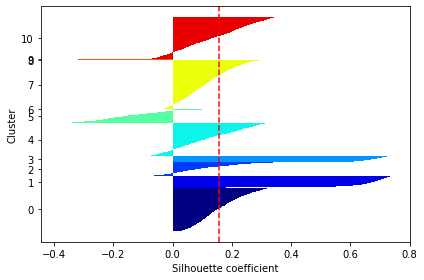

In [480]:
plot_silhouettes(data_s, clusters)

In [481]:
clusters

array([0, 0, 7, ..., 4, 2, 4])

In [482]:
target

0       0
1       0
2       0
3       0
4       5
       ..
7643    4
7644    9
7645    9
7646    9
7647    9
Name: target, Length: 7012, dtype: int32

In [483]:
target = target.to_numpy()
target = target.ravel()

In [484]:
c = clusters.ravel()

In [485]:
print(completeness_score(target,c))

0.049155804529365583


In [486]:
print(homogeneity_score(target,c))

0.042927335722190214


The completeness and homogeneity scores were disappointing. The size of the clusters seemed close to the sizes of the target sizes. However, stocks were incorrectly placed into the wrong cluster. 